In [2]:
#import cv2, numpy and matplotlib libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

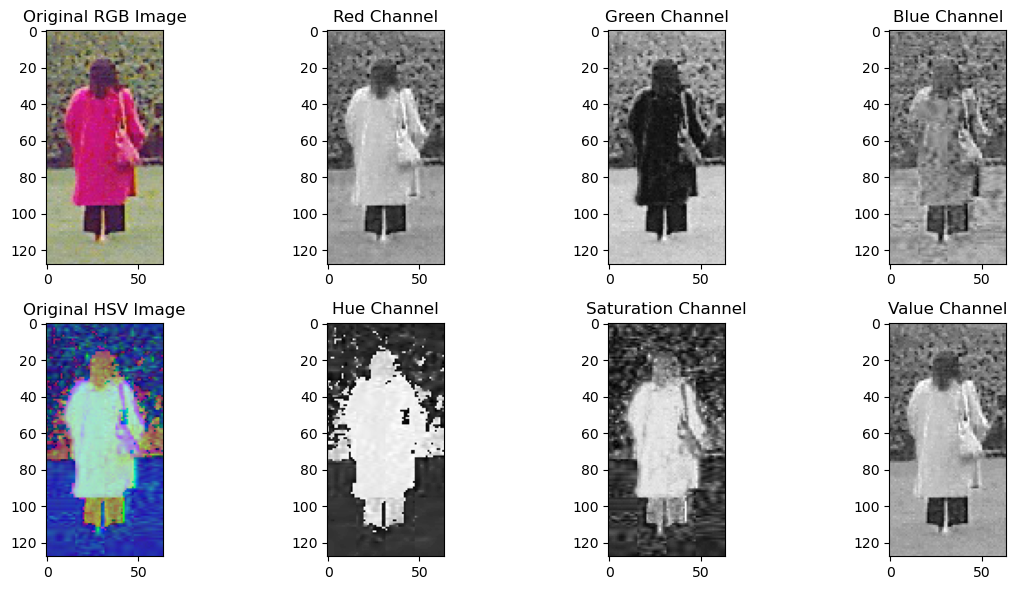

In [12]:
# Read an RGB image
img = cv2.imread("test.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert RGB image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split channels for RGB image
r_channel, g_channel, b_channel = cv2.split(img_rgb)

# Split channels for HSV image
h_channel, s_channel, v_channel = cv2.split(img_hsv)

# Plotting in 2 rows and 4 columns
plt.figure(figsize=(12, 6))

# Plotting the original RGB image
plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')

# Plotting the individual channels of RGB
plt.subplot(2, 4, 2)
plt.imshow(r_channel, cmap='gray')
plt.title('Red Channel')

plt.subplot(2, 4, 3)
plt.imshow(g_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(2, 4, 4)
plt.imshow(b_channel, cmap='gray')
plt.title('Blue Channel')

# Plotting the original HSV image
plt.subplot(2, 4, 5)
plt.imshow(img_hsv)
plt.title('Original HSV Image')

# Plotting the individual channels of HSV
plt.subplot(2, 4, 6)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')

plt.subplot(2, 4, 7)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')

plt.subplot(2, 4, 8)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')

plt.tight_layout()
plt.show()

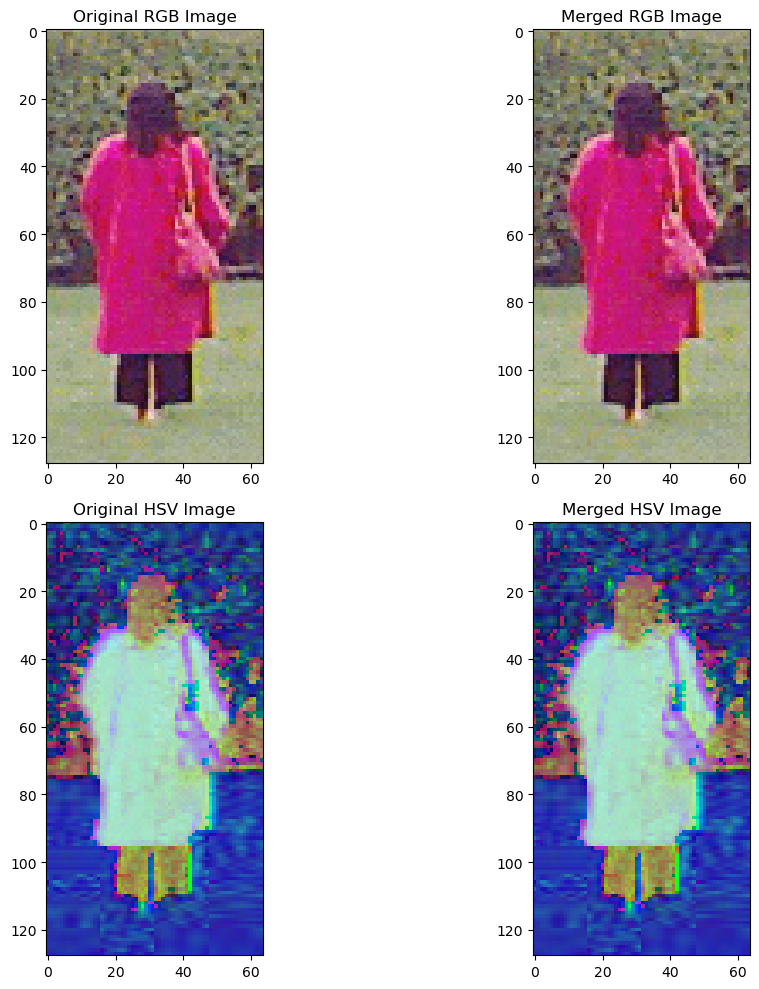

In [15]:
# Plotting in 2 rows and 2 columns
plt.figure(figsize=(12, 10))

# Original RGB image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')

# Merged RGB image
plt.subplot(2, 2, 2)
plt.imshow(merged_rgb)
plt.title('Merged RGB Image')

# Original HSV image
plt.subplot(2, 2, 3)
plt.imshow(img_hsv)
plt.title('Original HSV Image')

# Merged HSV image
plt.subplot(2, 2, 4)
plt.imshow(merged_hsv)
plt.title('Merged HSV Image')

plt.tight_layout()
plt.show()

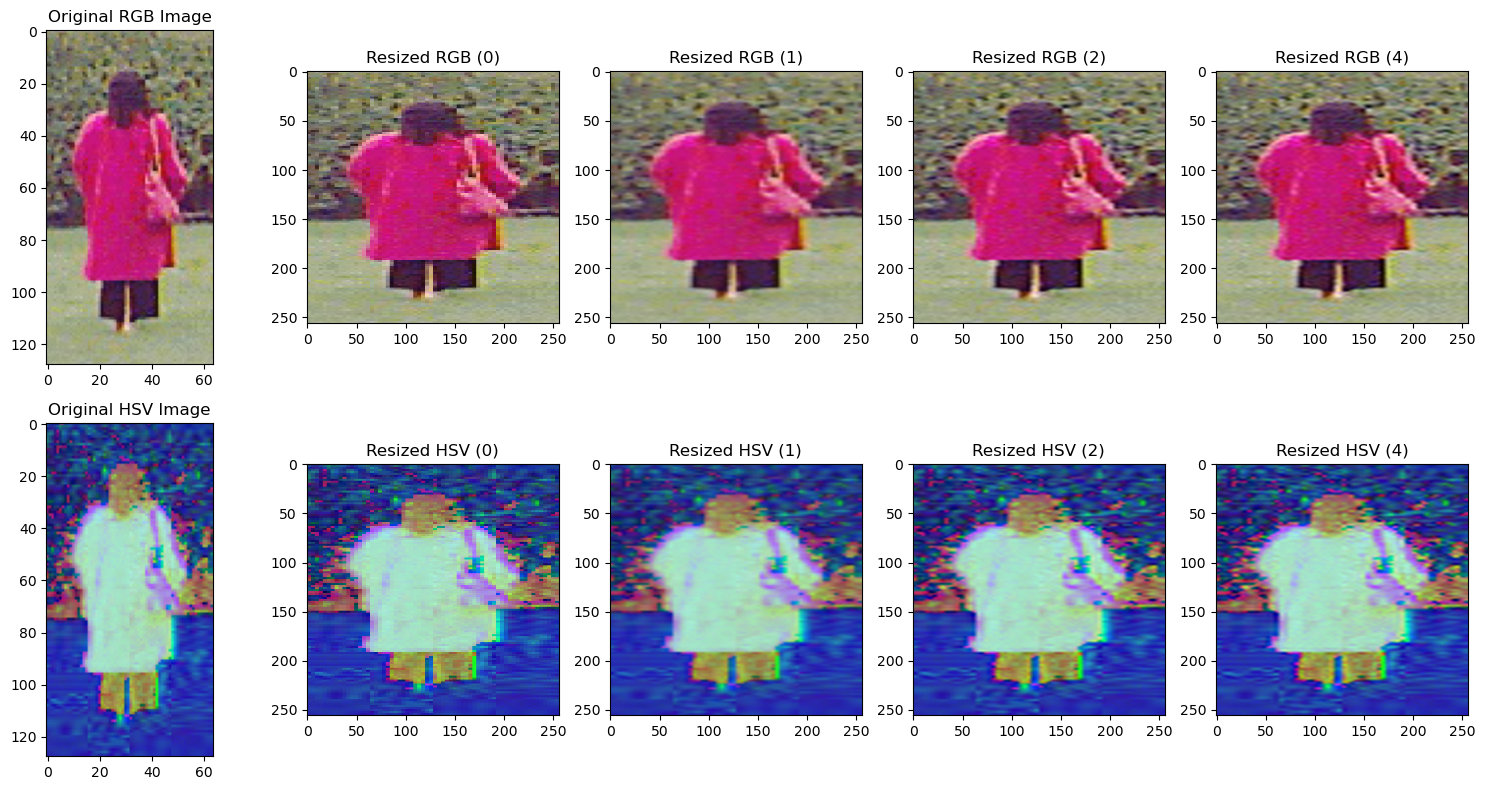

In [33]:
import cv2
import matplotlib.pyplot as plt

# Read an RGB image
img = cv2.imread("test.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert RGB image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define suggested sizes
suggested_size_rgb = (256, 256)
suggested_size_hsv = (256, 256)

# Resize RGB and HSV images using different interpolation methods
resize_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
resized_images_rgb = []
resized_images_hsv = []

plt.figure(figsize=(15, 8))

# Original RGB image
plt.subplot(2, 5, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')

# Original HSV image
plt.subplot(2, 5, 6)
plt.imshow(img_hsv)
plt.title('Original HSV Image')

# Resize RGB images
for i, method in enumerate(resize_methods, start=2):
    resized_rgb = cv2.resize(img_rgb, suggested_size_rgb, interpolation=method)
    resized_images_rgb.append((f'Resized RGB ({method})', resized_rgb))
    plt.subplot(2, 5, i)
    plt.imshow(resized_rgb)
    plt.title(f'Resized RGB ({method})')

# Resize HSV images
for i, method in enumerate(resize_methods, start=7):
    resized_hsv = cv2.resize(img_hsv, suggested_size_hsv, interpolation=method)
    resized_images_hsv.append((f'Resized HSV ({method})', resized_hsv))
    plt.subplot(2, 5, i)
    plt.imshow(resized_hsv)
    plt.title(f'Resized HSV ({method})')

plt.tight_layout()
plt.show()


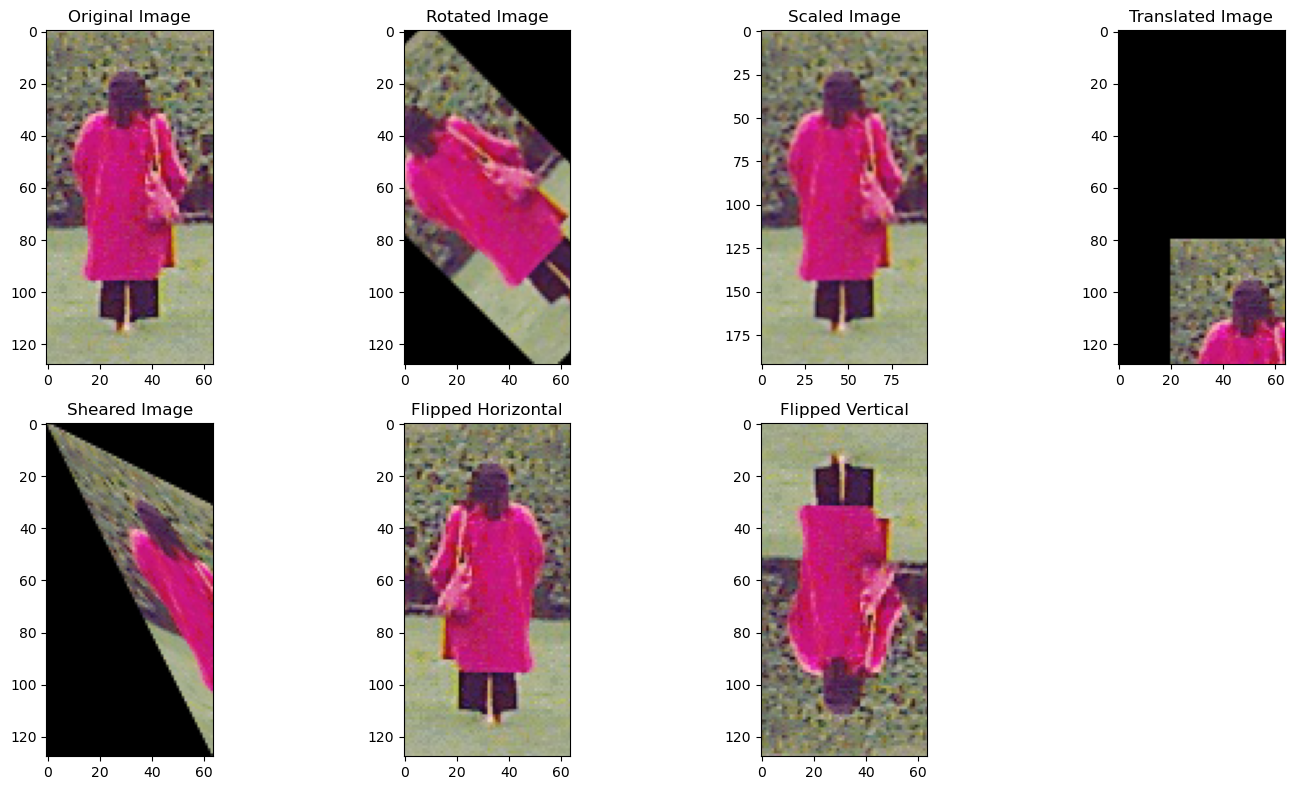

In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read an RGB image
img = cv2.imread("test.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define transformation parameters
angle = 45  # Rotation angle in degrees
scale_factor = 1.5  # Scaling factor
translation_matrix = np.float32([[1, 0, 20], [0, 1, 80]])  # Translation matrix (x=50, y=30)
shear_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])  # Shearing matrix (x-shear=0.5, y-shear=0.5)

# Apply transformations
# 1 no scaling, 2x3 matrix with 45 angle and no scaling. 
img_rotated = cv2.warpAffine(img_rgb, cv2.getRotationMatrix2D((img_rgb.shape[1]//2, img_rgb.shape[0]//2), angle, 1), 
                             (img_rgb.shape[1], img_rgb.shape[0]))
#When None is used as the target size, it means that the size of the output image is determined by the 
#scaling factors fx and fy instead of specifying an exact size.
img_scaled = cv2.resize(img_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
img_translated = cv2.warpAffine(img_rgb, translation_matrix, (img_rgb.shape[1], img_rgb.shape[0]))
img_sheared = cv2.warpAffine(img_rgb, shear_matrix, (img_rgb.shape[1], img_rgb.shape[0]))
img_flipped_horizontal = cv2.flip(img_rgb, 1)  # 1 for horizontal flip
img_flipped_vertical = cv2.flip(img_rgb, 0)  # 0 for vertical flip

# Display the original and transformed images
plt.figure(figsize=(15, 8))

plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 4, 2)
plt.imshow(img_rotated)
plt.title('Rotated Image')

plt.subplot(2, 4, 3)
plt.imshow(img_scaled)
plt.title('Scaled Image')

plt.subplot(2, 4, 4)
plt.imshow(img_translated)
plt.title('Translated Image')

plt.subplot(2, 4, 5)
plt.imshow(img_sheared)
plt.title('Sheared Image')

plt.subplot(2, 4, 6)
plt.imshow(img_flipped_horizontal)
plt.title('Flipped Horizontal')

plt.subplot(2, 4, 7)
plt.imshow(img_flipped_vertical)
plt.title('Flipped Vertical')

plt.tight_layout()
plt.show()


In [47]:
a=cv2.getRotationMatrix2D((img_rgb.shape[1]//2, img_rgb.shape[0]//2), angle, 1)

In [48]:
a

array([[  0.70710678,   0.70710678, -35.88225099],
       [ -0.70710678,   0.70710678,  41.372583  ]])

In [54]:
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
def load_data_from_directory(directory_path):
    X = []
    y = []

    for label, class_name in enumerate(os.listdir(directory_path)):
        class_path = os.path.join(directory_path, class_name)
        
        for file_name in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
            file_path = os.path.join(class_path, file_name)

            # Add code for reading images based on the format of your dataset
            # For example, using skimage
            image = cv2.imread(file_path)

            # Add code for extracting labels based on the format of your dataset
            # For example, using file or directory names
            label = int(class_name)

            X.append(image)
            y.append(label)

    return np.array(X), np.array(y)

# Specify the path to your dataset directory
dataset_path = "F:\Research-Data\Datasets\PGCdatasets\MIT-IB"

# Load data
X, y = load_data_from_directory(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading 22: 100%|██████████| 600/600 [00:00<00:00, 6147.18it/s]


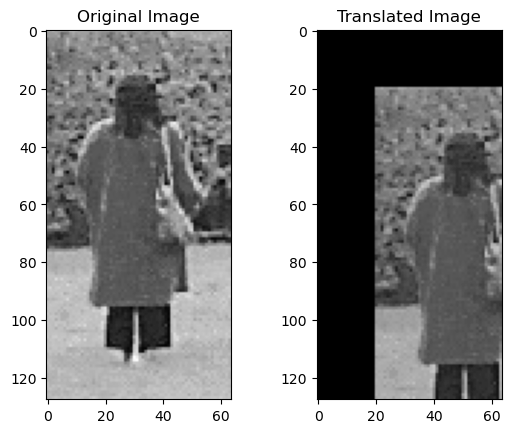

In [75]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# Read the image in grayscale
img = cv.imread('test.jpg', cv.IMREAD_GRAYSCALE)
# Get the number of rows and columns in the image
rows, cols = img.shape
# Define the translation matrix
M = np.float32([[1, 0, 20], [0, 1, 20]])
# Apply the translation
dst = cv.warpAffine(img, M, (cols, rows))
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
# Plot the translated image
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.title('Translated Image')
# Display the plots
plt.show()


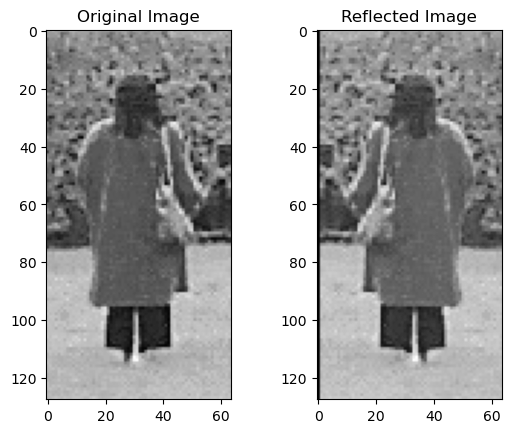

In [89]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the reflection matrix
# To flip the image vertically:
vM = np.float32([[-1, 0, cols],[0, 1, 0], [0, 0, 1]])
# Apply the reflection
reflected_img = cv.warpPerspective(img, vM, (cols, rows))
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the reflected image
plt.subplot(1, 2, 2)
plt.imshow(reflected_img, cmap='gray')
plt.title('Reflected Image')

# Display the plots
plt.show()


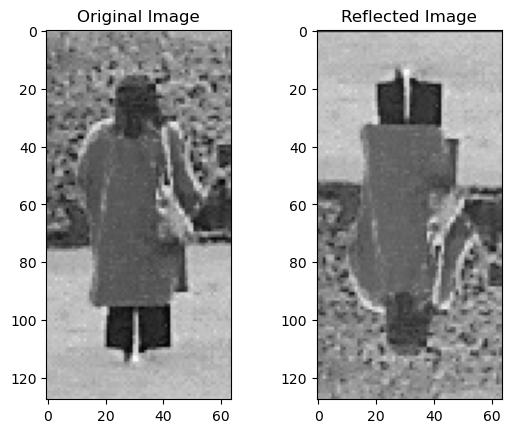

In [87]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the reflection matrix
# To flip the image horizontally:
hM = np.float32([[1,  0, 0],[0, -1, rows],[0,  0, 1]])
# Apply the reflection
reflected_img = cv.warpPerspective(img, hM, (cols, rows))
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the reflected image
plt.subplot(1, 2, 2)
plt.imshow(reflected_img, cmap='gray')
plt.title('Reflected Image')

# Display the plots
plt.show()


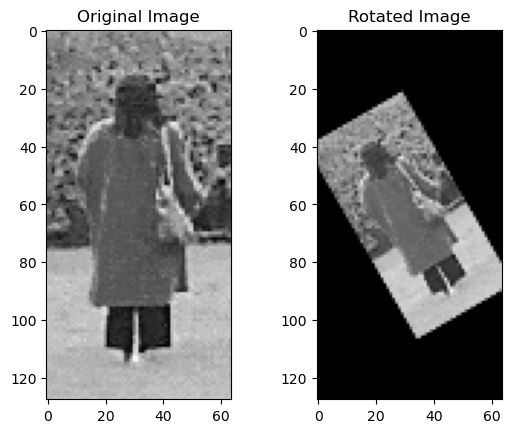

True

In [91]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the rotation matrix
M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])

# Apply the rotation
img_rotation = cv.warpAffine(img,cv.getRotationMatrix2D((cols/2, rows/2),30, 0.6),(cols, rows))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the rotated image
plt.subplot(1, 2, 2)
plt.imshow(img_rotation, cmap='gray')
plt.title('Rotated Image')

# Display the plots
plt.show()
cv.imwrite('rotation_out.jpg', img_rotation)

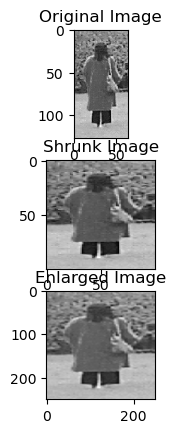

In [95]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)

# Shrink the image
img_shrinked = cv.resize(img, (100, 100), interpolation=cv.INTER_AREA)

# Enlarge the shrunken image
img_enlarged = cv.resize(img_shrinked, None, fx=2.5, fy=2.5, interpolation=cv.INTER_CUBIC)

# Plot the original image
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the shrunk image
plt.subplot(3, 1, 2)
plt.imshow(img_shrinked, cmap='gray')
plt.title('Shrunk Image')

# Plot the enlarged image
plt.subplot(3, 1, 3)
plt.imshow(img_enlarged, cmap='gray')
plt.title('Enlarged Image')

# Display the plots
plt.show()


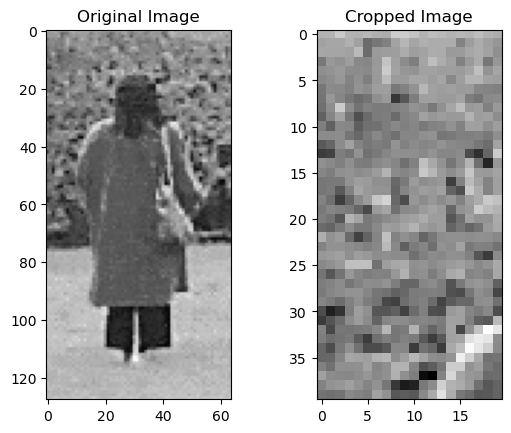

True

In [102]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)

# Crop the image
cropped_img = img[0:40, 0:20]

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the cropped image
plt.subplot(1, 2, 2)
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')

# Display the plots
plt.show()
cv.imwrite('cropped_out.jpg', cropped_img)

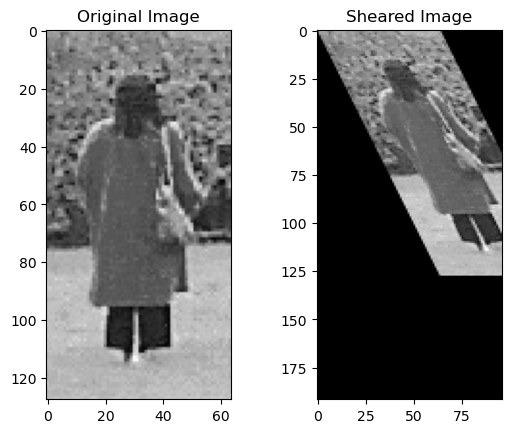

In [103]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the shearing matrix
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])

# Apply the shearing
sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the sheared image
plt.subplot(1, 2, 2)
plt.imshow(sheared_img, cmap='gray')
plt.title('Sheared Image')

# Display the plots
plt.show()


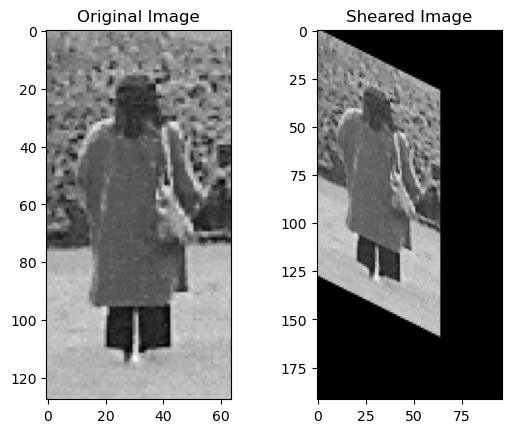

In [105]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv.imread('test.jpg', 0)
rows, cols = img.shape

# Define the shearing matrix
M = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])

# Apply the shearing
sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Plot the sheared image
plt.subplot(1, 2, 2)
plt.imshow(sheared_img, cmap='gray')
plt.title('Sheared Image')

# Display the plots
plt.show()
